1. Passos iniciais

In [1]:
!pip install tensorflow tensorflow opencv-python matplotlib pip install

     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     --------------------- ----------------- 92.2/165.5 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 165.5/165.5 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.8 MB 5.6 MB/s eta 0:00:07
   ---------------------------------------- 0.3/38.8 MB 5.0 MB/s eta 0:00:08
    --------------------------------------- 0.6/38.8 MB 4.4 MB/s eta 0:00:09
    --------------------------------------- 0.8/38.8 MB 4.6 MB/s eta 0:00:09
   - -------------------------------------- 1.1/38.8 MB 5.2 MB/s eta 0:00:08
   - -------------------------------------- 1.6/38.8 MB 5.9 MB/s eta 0:00:07
   - -------------------------------------- 1.9/38.8 MB 6.0 MB/s eta 0:00:07
   -- ------------------------------------- 2.5/38.8 MB 7.0 MB/s eta 0:00:06
   --- ------------------------------------ 3.0/38.8 MB 7.3 MB/s eta 0:00:05
   -

In [ ]:
!pip install tensorflow

In [ ]:
!pip install --upgrade numpy

In [9]:
!pip install --upgrade h5py

In [13]:
!pip install scipy

In [2]:
os.listdir('Dataset')

NameError: name 'os' is not defined

In [2]:
pip uninstall h5py
pip install h5py

^C
Found existing installation: h5py 3.11.0
Uninstalling h5py-3.11.0:
  Would remove:
    c:\users\joao_\anaconda3\lib\site-packages\h5py-3.11.0.dist-info\*
    c:\users\joao_\anaconda3\lib\site-packages\h5py\_selector.cp38-win_amd64.pyd
    c:\users\joao_\anaconda3\lib\site-packages\h5py\hdf5.dll
    c:\users\joao_\anaconda3\lib\site-packages\h5py\hdf5_hl.dll
    c:\users\joao_\anaconda3\lib\site-packages\h5py\tests\conftest.py
    c:\users\joao_\anaconda3\lib\site-packages\h5py\tests\data_files\*
    c:\users\joao_\anaconda3\lib\site-packages\h5py\tests\test_big_endian_file.py
    c:\users\joao_\anaconda3\lib\site-packages\h5py\tests\test_errors.py
    c:\users\joao_\anaconda3\lib\site-packages\h5py\tests\test_file_alignment.py
    c:\users\joao_\anaconda3\lib\site-packages\h5py\tests\test_h5o.py
    c:\users\joao_\anaconda3\lib\site-packages\h5py\tests\test_h5z.py
    c:\users\joao_\anaconda3\lib\site-packages\h5py\tests\test_ros3.py
    c:\users\joao_\anaconda3\lib\site-packages\h5

In [ ]:
!pip install scikit-learn

In [6]:
# Não funciona para já
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
tf.config.list_physical_devices('GPU')

[]

# Valuable functions

In [47]:
import tensorflow as tf
import os
import h5py
import scipy
from collections import defaultdict
from PIL import Image
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


#Colocar a imagem com as caracteristicas padrão para poder ser analisada
def preprocess_image(image_path, target_size=(224, 224)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array) # Normalize to [0, 1]
    return img_array

#Extrair as features de uma imagem singular cujo upload foi feito
def classify_and_extract_features(image_path, model, feature_extractor):
    img_array = preprocess_image(image_path)
    # Classification
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)
    # Feature extraction
    features = feature_extractor.predict(img_array)
    return predicted_class_index, features



#Criar o modelo que permite extrair as categorias
from tensorflow.keras.models import Model
def create_feature_extractor(model, layers_to_remove):
    # Remove the last layer (softmax layer for classification)
    feature_model = Model(inputs=model.input,
                          outputs=model.layers[layers_to_remove].output)  # Adjust the index according to your model structure
    return feature_model

#Extrair as caracteriscas das imagens
def classify_and_extract_features(image_path, model, feature_extractor):
    img_array = preprocess_image(image_path)
    # Classification
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)
    # Feature extraction
    features = feature_extractor.predict(img_array)
    return predicted_class_index, features

# Calcular a semelhança entre as imagens
from sklearn.metrics.pairwise import cosine_similarity
def calculate_similarity(feature_vec1, feature_vec2):
    # Reshape feature vectors for compatibility with cosine_similarity function
    feature_vec1 = feature_vec1.reshape(1, -1)
    feature_vec2 = feature_vec2.reshape(1, -1)
    return cosine_similarity(feature_vec1, feature_vec2)[0][0]

#Encontrar o item mais semelhante
def find_most_similar(target_features, category_features):
    similarities = [calculate_similarity(target_features, features) for features in category_features]
    most_similar_index = np.argmax(similarities)
    return most_similar_index

#Encontrar os 5 items mais semelhantes
def find_top_similar(target_features, category_features, top_n=5):
    # Calculate similarities for all features in the category
    similarities = [calculate_similarity(target_features, features) for features in category_features]
    # Get indices of the top 'n' most similar features
    most_similar_indices = np.argsort(similarities)[::-1][:top_n]
    return most_similar_indices

def get_similar_items(image_path, model, feature_extractor, category_features, class_labels, top_n=5):
    predicted_class_index, features = classify_and_extract_features(image_path, model, feature_extractor)
    predicted_class_name = class_labels.get(predicted_class_index[0], "Unknown Category")
    
    if predicted_class_name in category_features:
        category_feature_vectors = [feat[1] for feat in category_features[predicted_class_name]]  # Extract only the features.
        most_similar_indices = find_top_similar(features, category_feature_vectors, top_n)
        print(f"Classified as: {predicted_class_name}")
        print(f"Top {top_n} most similar item indices in category '{predicted_class_name}': {most_similar_indices}")
        return predicted_class_name, most_similar_indices
    else:
        print(f"Category '{predicted_class_name}' not found in features.")
        return predicted_class_name, []

    
#Mostrar as imagens no ecrã    
def display_images_by_class_and_index(base_path, class_name, indices):
    # Path to the specific class directory
    class_path = os.path.join(base_path, class_name)
    
    # Fetch all image files in this directory
    all_images = sorted(os.listdir(class_path))
    
    # Filter images to retrieve only those with specified indices
    selected_images = [all_images[i] for i in indices if i < len(all_images)]
    
    # Display the selected images
    plt.figure(figsize=(10, 5))
    for idx, image_name in enumerate(selected_images):
        img_path = os.path.join(class_path, image_name)
        img = Image.open(img_path)
        plt.subplot(1, len(selected_images), idx + 1)
        plt.imshow(img)
        plt.title(image_name)
        plt.axis('off')
    plt.show()



# Augmentation for images

## General augmentation

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255, # Rescale images to normalize pixel values
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2 # Use this to split your data into training and validation sets
)

# Assuming you don't need augmentation for validation data
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


## Specific augmentation (resnet)

In [14]:
train_datagen_res = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2
)


validation_datagen_res = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

# Loading the data

## Preprocessamento do modelo personalizado

In [13]:
train_generator = train_datagen.flow_from_directory(
    'Dataset/', # Path to the dataset
    target_size=(150, 150), # Resize images (adjust according to your needs)
    batch_size=32,
    class_mode='categorical',
    subset='training' # Set as 'training' to use the training subset
)

validation_generator = validation_datagen.flow_from_directory(
    'Dataset/', # Path to the dataset
    target_size=(150, 150), # Resize images
    batch_size=32,
    class_mode='categorical',
    subset='validation' # Set as 'validation' to use the validation subset
)


NameError: name 'train_datagen' is not defined

## Preprocessamento do modelo AlexNet

In [7]:
train_generator_alex = train_datagen.flow_from_directory(
    'Dataset/', # Path to the dataset
    target_size=(227, 227), # Resize images (adjust according to your needs)
    batch_size=32,
    class_mode='categorical',
    subset='training' # Set as 'training' to use the training subset
)

validation_generator_alex = validation_datagen.flow_from_directory(
    'Dataset/', # Path to the dataset
    target_size=(227, 227), # Resize images
    batch_size=32,
    class_mode='categorical',
    subset='validation' # Set as 'validation' to use the validation subset
)

Found 5170 images belonging to 32 classes.
Found 1273 images belonging to 32 classes.


## Preprocessamento do modelo InceptionNet V3

In [8]:
train_generator_inception = train_datagen.flow_from_directory(
    'Dataset/', # Path to the dataset
    target_size=(299, 299), # Resize images (adjust according to your needs)
    batch_size=32,
    class_mode='categorical',
    subset='training' # Set as 'training' to use the training subset
)

validation_generator_inception = validation_datagen.flow_from_directory(
    'Dataset/', # Path to the dataset
    target_size=(299, 299), # Resize images
    batch_size=32,
    class_mode='categorical',
    subset='validation' # Set as 'validation' to use the validation subset
)

Found 5170 images belonging to 32 classes.
Found 1273 images belonging to 32 classes.


## Preprocessamento do modelo ResNet50

In [61]:
train_generator_res = train_datagen_res.flow_from_directory(
    'Dataset/', # Path to the dataset
    target_size=(224, 224), # Resize images (adjust according to your needs)
    batch_size=32,
    class_mode='categorical',
    subset='training' # Set as 'training' to use the training subset
)

validation_generator_res = validation_datagen_res.flow_from_directory(
    'Dataset/', # Path to the dataset
    target_size=(224, 224), # Resize images
    batch_size=32,
    class_mode='categorical',
    subset='validation' # Set as 'validation' to use the validation subset
)

Found 5170 images belonging to 32 classes.
Found 1273 images belonging to 32 classes.


# Trainning the model

## Treino do modelo ResNet

In [65]:
# Teste script new
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.metrics import Precision, Recall
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Define data generators with improved augmentation
train_datagen_res = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

validation_datagen_res = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_generator_res = train_datagen_res.flow_from_directory(
    'Dataset/', 
    target_size=(224, 224), 
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator_res = validation_datagen_res.flow_from_directory(
    'Dataset/', 
    target_size=(224, 224), 
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Define the input tensor and load the base model
input_tensor = Input(shape=(224, 224, 3))
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Add layers to the base model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(32, activation='softmax')(x)

# Create the final model
model_res = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with a lower learning rate
model_res.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

# Compute class weights
class_indices = train_generator_res.class_indices
class_weights = compute_class_weight('balanced', classes=np.unique(train_generator_res.classes), y=train_generator_res.classes)
class_weights_dict = {class_indices[class_name]: weight for class_name, weight in zip(class_indices.keys(), class_weights)}

# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history_res = model_res.fit(train_generator_res,
                            steps_per_epoch=train_generator_res.samples // train_generator_res.batch_size,
                            validation_data=validation_generator_res,
                            validation_steps=validation_generator_res.samples // validation_generator_res.batch_size,
                            epochs=50,  # Increase the number of epochs
                            class_weight=class_weights_dict,  # Add class weights
                            callbacks=[reduce_lr, early_stopping])



Found 5170 images belonging to 32 classes.
Found 1273 images belonging to 32 classes.
Epoch 1/50


c:\PF\Projeto_final\web\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


161/161 ━━━━━━━━━━━━━━━━━━━━ 1142s 7s/step - accuracy: 0.1473 - loss: 3.3562 - precision: 0.6444 - recall: 0.0463 - val_accuracy: 0.6522 - val_loss: 1.1738 - val_precision: 0.8745 - val_recall: 0.5136 - learning_rate: 1.0000e-04
Epoch 2/50
  1/161 ━━━━━━━━━━━━━━━━━━━━ 17:19 6s/step - accuracy: 0.5938 - loss: 1.8008 - precision: 0.9091 - recall: 0.3125

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1264.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


161/161 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5938 - loss: 1.8008 - precision: 0.9091 - recall: 0.3125 - val_accuracy: 0.7200 - val_loss: 1.1351 - val_precision: 0.9333 - val_recall: 0.5600 - learning_rate: 1.0000e-04
Epoch 3/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1079s 7s/step - accuracy: 0.5129 - loss: 1.9664 - precision: 0.8539 - recall: 0.3338 - val_accuracy: 0.7748 - val_loss: 0.8951 - val_precision: 0.8736 - val_recall: 0.6426 - learning_rate: 1.0000e-04
Epoch 4/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7188 - loss: 1.3302 - precision: 0.7778 - recall: 0.4375 - val_accuracy: 0.7200 - val_loss: 0.7914 - val_precision: 0.9375 - val_recall: 0.6000 - learning_rate: 1.0000e-04
Epoch 5/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1081s 7s/step - accuracy: 0.6660 - loss: 1.3616 - precision: 0.8613 - recall: 0.5161 - val_accuracy: 0.8301 - val_loss: 0.5604 - val_precision: 0.8892 - val_recall: 0.7588 - learning_rate: 1.0000e-04
Epoch 6/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step -

In [63]:
# Define the input tensor
input_tensor = Input(shape=(224, 224, 3))

# Load the ResNet50 model, excluding the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Add global average pooling to reduce feature map dimensions from (7, 7, 2048) to (1, 2048)
x = GlobalAveragePooling2D()(base_model.output)

# Add a dense layer with the number of classes you need
predictions = Dense(32, activation='softmax')(x)

# This is the model we will train
model_res = Model(inputs=base_model.input, outputs=predictions)

#model.summary()

model_res.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

history_res = model_res.fit(train_generator_res,
                    steps_per_epoch=train_generator_res.samples // train_generator_res.batch_size,
                    validation_data=validation_generator_res,
                    validation_steps=validation_generator_res.samples // validation_generator_res.batch_size,
                    epochs=10)  # You can adjust the number of epochs based on your needs




Found 5170 images belonging to 32 classes.
Found 1273 images belonging to 32 classes.
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\PF\Projeto_final\web\env\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\joarosad\AppData\Local\Temp\ipykernel_15232\910601498.py", line 80, in <module>
    history_res = model_res.fit(train_generator_res,
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\PF\Projeto_final\web\env\Lib\site-packages\keras\src\utils\traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\PF\Projeto_final\web\env\Lib\site-packages\keras\src\utils\traceback_utils.py", line 119, in error_handler
    filtered_tb = _process_traceback_frames(e.__traceback__)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: TensorFlowTrainer.fit() got an unexpected keyword argument 'workers'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  F

In [66]:
model_res.save('C:\\PF\\Projeto_final\\web\\resnet2_model.h5')  # Ensure to use double backslashes or raw string
model_res.save('C:\\PF\\Projeto_final\\web\\resnet2_model.keras')  # TensorFlow will create a directory with this name

Explanation:
Base Model: Load the ResNet50 without the top layer, which is typically a fully connected layer used for classification.
Global Average Pooling: This layer is used to average out the spatial dimensions, so you're left with a 1D feature vector per filter in the previous layer.
Custom Output Layer: Add a Dense layer with as many neurons as you have classes (32 in your case), with a 'softmax' activation function for multi-class classification.


## Treino modelo InceptionV3

In [13]:
# Define the input tensor
input_tensor = Input(shape=(299, 299, 3))

# Load the InceptionV3 model, excluding the top (fully connected) layers
# Include the necessary adjustments for the input tensor and weight initialization
base_model = InceptionV3(weights='imagenet', include_top=False, input_tensor=input_tensor, pooling='avg')

# No need for a separate GlobalAveragePooling2D layer as 'pooling=avg' does this in the model loading

# Add a dense layer with the number of classes you need
predictions = Dense(32, activation='softmax')(base_model.output)

# This is the model we will train
model_inception = Model(inputs=base_model.input, outputs=predictions)

# Display the model summary to understand the architecture
#model.summary()

# Compile the model with appropriate optimizer, loss, and metrics
model_inception.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

# Assuming 'train_generator_res' and 'validation_generator_res' are already defined
history_inception = model_inception.fit(
    train_generator_inception,
    steps_per_epoch=train_generator_inception.samples // train_generator_inception.batch_size,
    validation_data=validation_generator_inception,
    validation_steps=validation_generator_inception.samples // validation_generator_inception.batch_size,
    epochs=5  # Adjust the number of epochs based on your needs
)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
Epoch 1/5


c:\PF\Projeto_final\web\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


161/161 ━━━━━━━━━━━━━━━━━━━━ 1683s 10s/step - accuracy: 0.5936 - loss: 1.4681 - precision: 0.7823 - recall: 0.4658 - val_accuracy: 0.4728 - val_loss: 2.7172 - val_precision: 0.5538 - val_recall: 0.4167
Epoch 2/5
  1/161 ━━━━━━━━━━━━━━━━━━━━ 22:53 9s/step - accuracy: 0.8438 - loss: 0.3710 - precision: 0.9286 - recall: 0.8125

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1264.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


161/161 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.8438 - loss: 0.3710 - precision: 0.9286 - recall: 0.8125 - val_accuracy: 0.4800 - val_loss: 2.1961 - val_precision: 0.6316 - val_recall: 0.4800
Epoch 3/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 1515s 9s/step - accuracy: 0.8381 - loss: 0.5092 - precision: 0.8865 - recall: 0.7938 - val_accuracy: 0.7139 - val_loss: 1.1940 - val_precision: 0.7424 - val_recall: 0.6883
Epoch 4/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.8750 - loss: 0.4619 - precision: 0.9310 - recall: 0.8438 - val_accuracy: 0.6000 - val_loss: 1.2376 - val_precision: 0.7895 - val_recall: 0.6000
Epoch 5/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 1446s 9s/step - accuracy: 0.8706 - loss: 0.3996 - precision: 0.9077 - recall: 0.8384 - val_accuracy: 0.7308 - val_loss: 0.9112 - val_precision: 0.7815 - val_recall: 0.6907


In [14]:
model_inception.save('C:\\PF\\Projeto_final\\web\\inception_model.h5')  # Ensure to use double backslashes or raw string
model_inception.save('C:\\PF\\Projeto_final\\web\\inception_model.keras')  # TensorFlow will create a directory with this name

## Treino do modelo AlexNet

In [ ]:
def alexnet(input_shape=(227, 227, 3), num_classes=32):  # Adjust num_classes to 32
    model_alex = Sequential([
        Conv2D(96, kernel_size=11, strides=4, activation='relu', input_shape=input_shape, padding='same'),
        MaxPooling2D(pool_size=3, strides=2),
        Conv2D(256, kernel_size=5, activation='relu', padding='same'),
        MaxPooling2D(pool_size=3, strides=2),
        Conv2D(384, kernel_size=3, activation='relu', padding='same'),
        Conv2D(384, kernel_size=3, activation='relu', padding='same'),
        Conv2D(256, kernel_size=3, activation='relu', padding='same'),
        MaxPooling2D(pool_size=3, strides=2),
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model_alex

# Instantiate the AlexNet model for 32 classes
model_alex = alexnet(num_classes=32)

# Compile the model
model_alex.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

# Display the model summary to understand the architecture
#model_alex.summary()

history_alex = model_alex.fit(
    train_generator_alex,
    steps_per_epoch=train_generator_alex.samples // train_generator_alex.batch_size,
    validation_data=validation_generator_alex,
    validation_steps=validation_generator_alex.samples // validation_generator_alex.batch_size,
    epochs=5  # Adjust the number of epochs based on your needs
)

## O meu modelo personalizado

In [5]:
#Modelo personalizado por mim pessoalmente
# Define the model
model = Sequential([
    # Convolutional block 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    # Convolutional block 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    # Convolutional block 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    # Convolutional block 4
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    # Global Average Pooling
    GlobalAveragePooling2D(),

    # Fully connected layers
    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    BatchNormalization(),

    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    BatchNormalization(),

    # Final output layer (adjust NUM_CLASSES to match your number of classes)
    Dense(32, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10 # Adjust based on your needs
)


c:\PF\Projeto_final\web\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


c:\PF\Projeto_final\web\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


161/161 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.1558 - loss: 8.2675 - precision: 0.3693 - recall: 0.0364 - val_accuracy: 0.0441 - val_loss: 7.6549 - val_precision: 0.1040 - val_recall: 0.0337
Epoch 2/10
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1:00 379ms/step - accuracy: 0.3438 - loss: 5.7280 - precision: 0.6667 - recall: 0.1875

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1264.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3438 - loss: 5.7280 - precision: 0.6667 - recall: 0.1875 - val_accuracy: 0.0400 - val_loss: 7.5034 - val_precision: 0.1000 - val_recall: 0.0400
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.3523 - loss: 5.1217 - precision: 0.6049 - recall: 0.1630 - val_accuracy: 0.0986 - val_loss: 5.3950 - val_precision: 1.0000 - val_recall: 8.0128e-04
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4375 - loss: 3.8309 - precision: 0.7273 - recall: 0.2500 - val_accuracy: 0.1200 - val_loss: 5.3137 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 0.4401 - loss: 3.4995 - precision: 0.7109 - recall: 0.2378 - val_accuracy: 0.1875 - val_loss: 4.8843 - val_precision: 0.2343 - val_recall: 0.1554
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6562 - loss: 2.3945 - precision: 0.8333 - recall: 0.3125 - val_accuracy: 0.2800 - val_loss:

KeyboardInterrupt: 

# Cria o feature extrator

In [67]:
model_res_loaded = load_model('C:\\PF\\Projeto_final\\web\\resnet2_model.h5')

In [73]:
feature_extractor = create_feature_extractor(model_res_loaded, -2)

# Extrating features from image dataset and saving to hdf5

'\ndef save_features_to_hdf5(data_directory, feature_extractor, target_size=(150, 150), hdf5_file="image_features.h5"):\n    with h5py.File(hdf5_file, \'w\') as f:\n        max_shape = (None,) + feature_extractor.output_shape[1:]  # Dynamically extendable shape\n        features_dset = f.create_dataset(\'features\', shape=(0,) + feature_extractor.output_shape[1:], maxshape=max_shape, dtype=\'float32\')\n        filenames_dset = f.create_dataset(\'filenames\', shape=(0,), maxshape=(None,), dtype=h5py.string_dtype(encoding=\'utf-8\'))\n        labels_dset = f.create_dataset(\'labels\', shape=(0,), maxshape=(None,), dtype=h5py.string_dtype())\n\n        i = 0  # Numero de imagens processadas\n        # O primeiro loop vai percorrer para cada categoria/pasta no diretório principal\n        # O loop interno vai percorrer cada imagem dentro dessa categoria/pasta\n        for category in os.listdir(data_directory):\n            category_path = os.path.join(data_directory, category)\n         

In [75]:
def save_features_to_hdf5(data_directory, feature_extractor, target_size=(224, 224), hdf5_file="image_features.h5"):
    with h5py.File(hdf5_file, 'w') as f:
        max_shape = (None,) + feature_extractor.output_shape[1:]  # Dynamically extendable shape
        features_dset = f.create_dataset('features', shape=(0,) + feature_extractor.output_shape[1:], maxshape=max_shape, dtype='float32')
        filenames_dset = f.create_dataset('filenames', shape=(0,), maxshape=(None,), dtype=h5py.string_dtype(encoding='utf-8'))
        labels_dset = f.create_dataset('labels', shape=(0,), maxshape=(None,), dtype=h5py.string_dtype())

        i = 0  # Numero de imagens processadas
        # O primeiro loop vai percorrer para cada categoria/pasta no diretório principal
        # O loop interno vai percorrer cada imagem dentro dessa categoria/pasta
        for category in os.listdir(data_directory):
            category_path = os.path.join(data_directory, category)
            if os.path.isdir(category_path):  # Ensure it's a directory
                for filename in os.listdir(category_path):
                    file_path = os.path.join(category_path, filename)
                    if os.path.isfile(file_path):
                        # Processa a imagem e extrair as caracteristicas
                        img = image.load_img(file_path, target_size=target_size)
                        img_array = image.img_to_array(img)
                        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

                        # Extract features
                        feature = feature_extractor.predict(img_array)

                        # Resize datasets if necessary
                        if i >= features_dset.shape[0]:
                            features_dset.resize((i + 1,) + feature_extractor.output_shape[1:])
                            filenames_dset.resize((i + 1,))
                            labels_dset.resize((i + 1,))

                        # Store the features, filename, and label
                        features_dset[i] = feature
                        filenames_dset[i] = file_path  # Save the full file path
                        labels_dset[i] = category  # Store the category name or index
                        i += 1


In [76]:
# Usage
data_directory = r'Dataset/'
hdf5_file = r'Features/features_data.h5'
save_features_to_hdf5(data_directory, feature_extractor, hdf5_file=hdf5_file)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━

In [77]:
def load_features_and_labels(hdf5_file):
    with h5py.File(hdf5_file, 'r') as f:
        features = np.array(f['features'])
        filenames = np.array(f['filenames'])
        labels = np.array(f['labels'])  # assuming labels are stored as categorical indices or names
    return features, filenames, labels

features, filenames, labels = load_features_and_labels(r'Features/features_data.h5')



In [78]:
def map_features_to_categories(features, filenames, labels):
    from collections import defaultdict
    category_dict = defaultdict(list)
    for feature, filename, label in zip(features, filenames, labels):
        category_dict[label.decode('utf-8')].append((filename.decode('utf-8'), feature))
    return category_dict

category_features = map_features_to_categories(features, filenames, labels)



In [79]:
filenames

array([b'Dataset/backpacks\\10774.jpg', b'Dataset/backpacks\\10775.jpg',
       b'Dataset/backpacks\\12740.jpg', ...,
       b'Dataset/woodie-man\\dbca8733-2f5d-4e72-94c2-376fd6cc3afa.jpg',
       b'Dataset/woodie-man\\f9870e0c-7906-4c63-87fe-fc12b8cd8d38.jpg',
       b'Dataset/woodie-man\\fd576f74-65ea-4c1f-95dc-1b541a9b7988.jpg'],
      dtype=object)

# Teste unitário

In [86]:
image_path = r'Dataset/9998.jpg'
modelo = model_res_loaded
class_labels = {index: label for label, index in train_generator_res.class_indices.items()}


predicted_class_name, most_similar_indices = get_similar_items(image_path, modelo, feature_extractor, category_features, class_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Classified as: tank-top-man
Top 5 most similar item indices in category 'tank-top-man': [84 46 81 31 25]


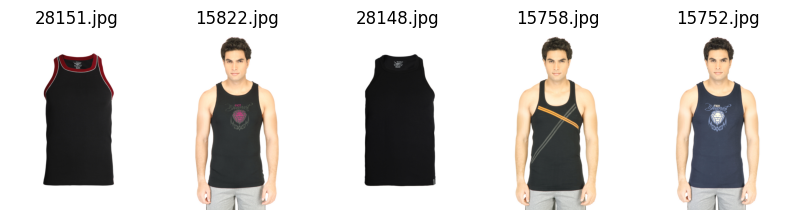

In [87]:
if most_similar_indices.size > 0:
    display_images_by_class_and_index('Dataset/', predicted_class_name, most_similar_indices)

In [ ]:
# Creating a feature extractor that uses the output from the last dense layer (excluding softmax)
#feature_extractor_abstract = Model(inputs=model.input, 
#                                           outputs=model.layers[-2].output)

# Image similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_similarity(feature_vec1, feature_vec2):
    # Reshape feature vectors for compatibility with cosine_similarity function
    feature_vec1 = feature_vec1.reshape(1, -1)
    feature_vec2 = feature_vec2.reshape(1, -1)
    return cosine_similarity(feature_vec1, feature_vec2)[0][0]

# Analysis of the results

In [10]:
def plot_model_history(history, title_prefix=''):
    # Plot accuracy
    plt.figure(figsize=(12, 10))
    
    plt.subplot(2, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title_prefix} Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    
    # Plot precision
    plt.subplot(2, 2, 2)
    plt.plot(history.history['precision'], label='Train Precision')
    plt.plot(history.history['val_precision'], label='Validation Precision')
    plt.title(f'{title_prefix} Model Precision')
    plt.ylabel('Precision')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    
    # Plot recall
    plt.subplot(2, 2, 3)
    plt.plot(history.history['recall'], label='Train Recall')
    plt.plot(history.history['val_recall'], label='Validation Recall')
    plt.title(f'{title_prefix} Model Recall')
    plt.ylabel('Recall')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    
    # Plot loss
    plt.subplot(2, 2, 4)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title_prefix} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    
    plt.tight_layout()
    plt.show()

# Example of how to use this function:
# plot_model_history(history_res, 'ResNet')
#plot_model_history(history, 'Custom Model')


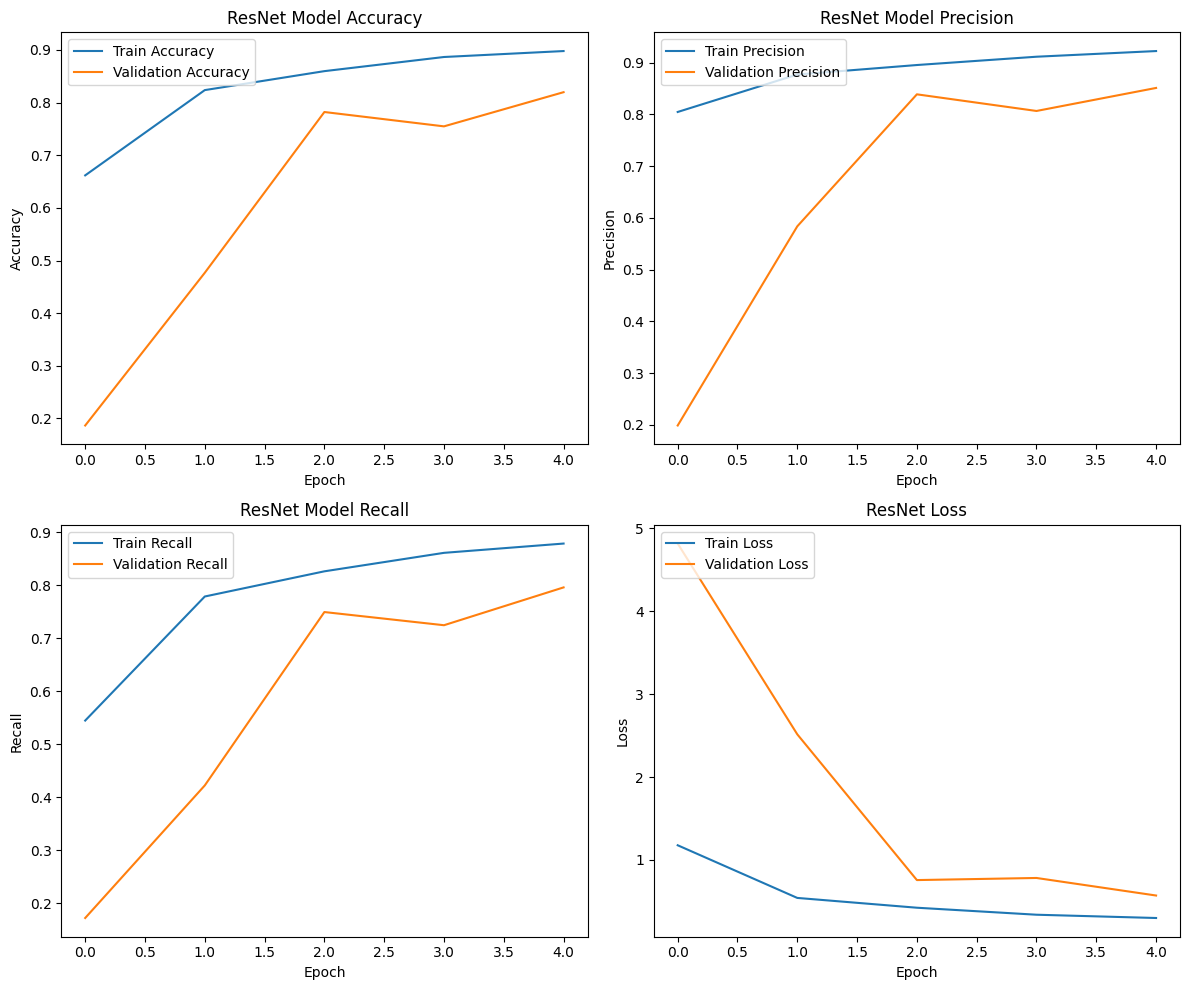

In [11]:
plot_model_history(history_res, 'ResNet')

In [13]:
model_res.save('res_model.keras')

KeyError: 'precision'

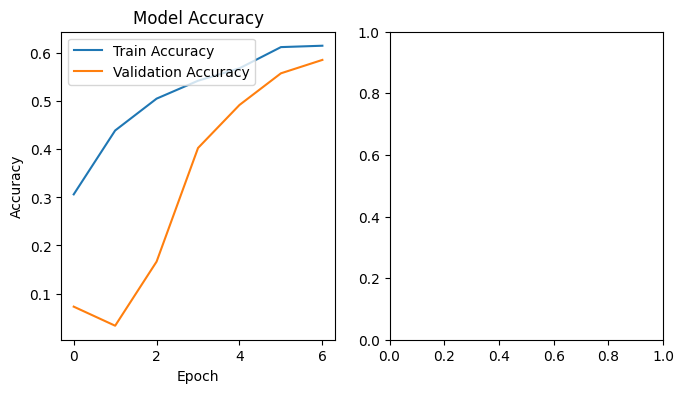

In [22]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation precision values
plt.subplot(1, 3, 2)
plt.plot(history.history['precision'], label='Train Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation recall values
plt.subplot(1, 3, 3)
plt.plot(history.history['recall'], label='Train Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Adjust layout
plt.tight_layout()

# Plot loss to assess overfitting/underfitting
plt.figure()
plt.plot(history.history['loss'], color='teal', label='Train Loss')
plt.plot(history.history['val_loss'], color='orange', label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()


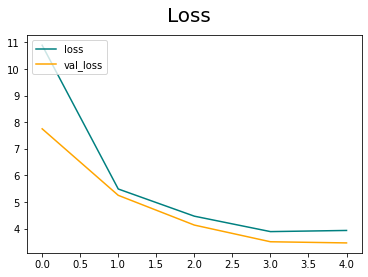

In [40]:
# Gráfico para avaliar o overfitting e underfitting
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

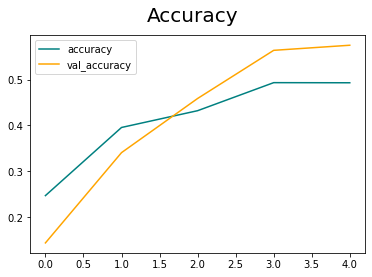

In [41]:
# Gráfico para visualizar a accurary
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

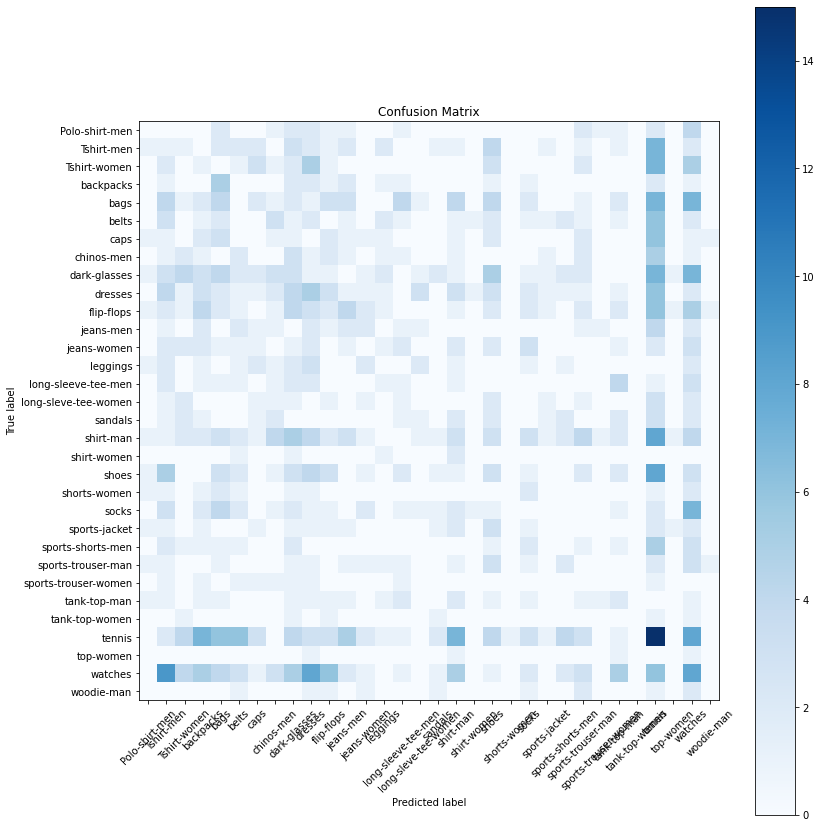

In [27]:
predictions = model.predict(validation_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = validation_generator.classes
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(validation_generator.class_indices))
plt.xticks(tick_marks, validation_generator.class_indices.keys(), rotation=45)
plt.yticks(tick_marks, validation_generator.class_indices.keys())
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [32]:
report = classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys())
print(report)

                      precision    recall  f1-score   support

      Polo-shirt-men       0.00      0.00      0.00        20
          Tshirt-men       0.02      0.03      0.02        37
        Tshirt-women       0.00      0.00      0.00        33
           backpacks       0.00      0.00      0.00        20
                bags       0.08      0.07      0.07        55
               belts       0.00      0.00      0.00        34
                caps       0.00      0.00      0.00        27
          chinos-men       0.00      0.00      0.00        25
        dark-glasses       0.05      0.05      0.05        60
             dresses       0.08      0.09      0.09        53
          flip-flops       0.05      0.04      0.04        51
           jeans-men       0.06      0.08      0.07        24
         jeans-women       0.00      0.00      0.00        29
            leggings       0.00      0.00      0.00        22
 long-sleeve-tee-men       0.04      0.05      0.05        21
long-sl

C:\Users\joao_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joao_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joao_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Teste com imagem exterior

In [44]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Carrega a imagem
img_path = r'Dataset\9915.jpg'  # Substitua com o caminho da sua imagem
img = image.load_img(img_path, target_size=(224, 224))  # O tamanho da imagem deve corresponder ao tamanho da entrada do modelo

# Converte a imagem para um array NumPy e normaliza para o intervalo de 0 a 1
img_array = image.img_to_array(img) / 255.0

# Adiciona uma dimensão extra para criar um batch de tamanho 1
# O modelo espera um batch, então mesmo que estejamos usando uma única imagem, precisamos adicionar uma dimensão para simular um batch
img_batch = np.expand_dims(img_array, axis=0)

# Faz a predição usando o modelo
predictions = model_res_loaded.predict(img_batch)

# O resultado, 'predictions', é um array com as probabilidades para cada classe
# Para obter o índice da classe com a maior probabilidade, você pode usar argmax
predicted_class = np.argmax(predictions, axis=1)

# Se você tem um mapeamento de índices de classe para rótulos de classe, pode traduzir o índice predito de volta para um rótulo
# Por exemplo, se você tiver um dicionário `class_labels` que mapeia índices numéricos para nomes de classes
class_labels = {index: label for label, index in train_generator_res.class_indices.items()}
# Obtenha o nome da classe prevista
predicted_class_name = class_labels[predicted_class[0]]

print("A imagem foi classificada como:", predicted_class_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
A imagem foi classificada como: long-sleve-tee-women


In [72]:
# Evaluate the model on the validation set
val_loss, val_accuracy, val_precision, val_recall = model_res_loaded.evaluate(validation_generator_res)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')
print(f'Validation Precision: {val_precision}')
print(f'Validation Recall: {val_recall}')


40/40 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.8381 - loss: 0.5990 - precision: 0.8798 - recall: 0.7930
Validation Loss: 0.6295726299285889
Validation Accuracy: 0.8326787352561951
Validation Precision: 0.873251736164093
Validation Recall: 0.7847604155540466


In [45]:
# Supondo que train_generator seja o seu gerador de dados de treinamento
class_labels = train_generator_res.class_indices

# O mapeamento 'class_labels' é um dicionário onde as chaves são os nomes das classes e os valores são os índices numéricos
# Para obter um dicionário onde as chaves são os índices numéricos e os valores são os nomes das classes, você pode inverter o 'class_labels'
class_labels = dict((v,k) for k,v in class_labels.items())

# Agora você pode usar este dicionário para obter o nome da classe a partir do índice numérico
print(class_labels)


{0: 'Polo-shirt-men', 1: 'Tshirt-men', 2: 'Tshirt-women', 3: 'backpacks', 4: 'bags', 5: 'belts', 6: 'bra', 7: 'caps', 8: 'dark-glasses', 9: 'dress-long', 10: 'dress-short', 11: 'flip-flops', 12: 'high-heels', 13: 'jeans-men', 14: 'jeans-women', 15: 'leggings', 16: 'long-sleeve-tee-men', 17: 'long-sleve-tee-women', 18: 'sandals', 19: 'shirt-man', 20: 'shoes', 21: 'shorts-men', 22: 'shorts-women', 23: 'socks', 24: 'sports-jacket', 25: 'sports-trouser-man', 26: 'sports-trouser-women', 27: 'tank-top-man', 28: 'tennis', 29: 'top-women', 30: 'watches', 31: 'woodie-man'}
